In [2]:
!pip install scikit-learn --quiet

In [15]:
import numpy as np

In [9]:
import pandas as pd
medical_df =pd.read_csv('medical.csv')
non_smoker_df=medical_df[medical_df.smoker=='no']

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()

In [6]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [13]:
input = non_smoker_df[['age']]
target = non_smoker_df.charges
print('Input.shape :',input.shape)
print('Target.shape:',target.shape)

Input.shape : (1064, 1)
Target.shape: (1064,)


In [95]:
model.fit(input,target)

LinearRegression()

In [18]:
model.predict(np.array([[21],
                        [37],
                        [61]]))

C:\Users\taush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 3520.80661289,  7796.78921819, 14210.76312614])

In [19]:
import plotly.express as px

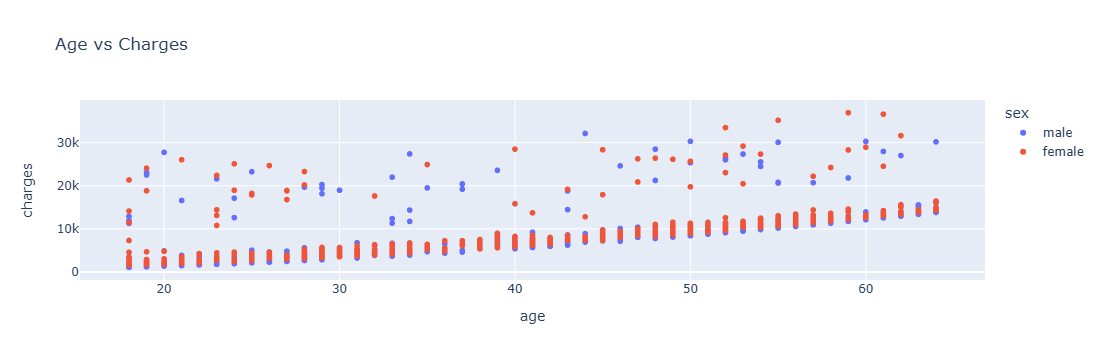

In [23]:
fig =px.scatter(non_smoker_df,
                  x= 'age',
                  y='charges',
                  color = 'sex',
                  title ='Age vs Charges')
fig.show()
                

In [81]:
model.predict(np.array([[18]]))

C:\Users\taush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([25788.40496489])

In [25]:
predicts = model.predict(input)

In [26]:
predicts

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [27]:
input

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [28]:
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [29]:
import matplotlib 
import matplotlib.pyplot as plt

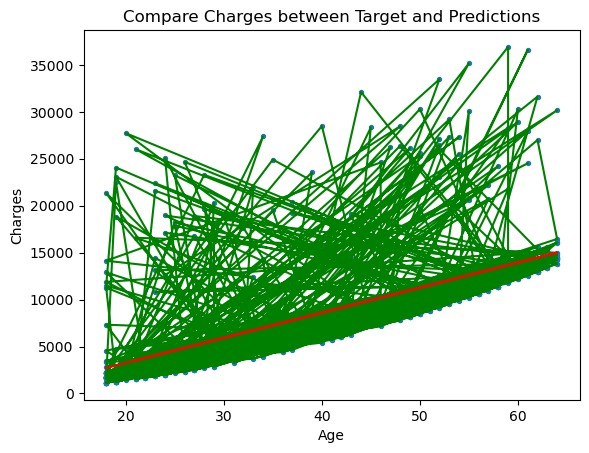

In [94]:
plt.title('Compare Charges between Target and Predictions');
plt.plot(non_smoker_df.age,target,'g');
plt.plot(non_smoker_df.age,predicts,'r');
plt.scatter(non_smoker_df.age,target,s=8);
plt.xlabel('Age');
plt.ylabel('Charges');


In [31]:
def estimate_charges(age,w,b):
    return w*age+b

In [32]:
def rmes(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [96]:
rmes(target,predicts)

4662.505766636395

In [34]:
def try_params(w,b):
    ages=non_smoker_df.age
    target = non_smoker_df.charges
    plt.title('Age vs Estimated Charge');
    
    x = estimate_charges(ages,w,b)
    plt.plot(ages,x,'r');
    plt.scatter(ages,target,s=8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);
    loss = rmes(target, x)
    print("RMES Loss:", loss)   

In [35]:
#w
model.coef_

array([267.24891283])

In [36]:
#b
model.intercept_

-2091.4205565650827

RMES Loss: 4662.505766636395


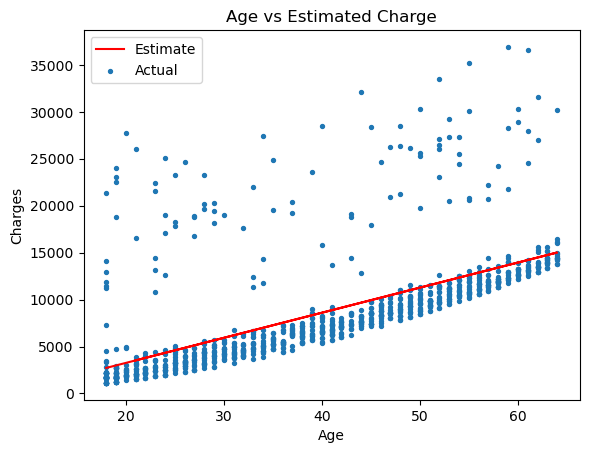

In [37]:
try_params(model.coef_,model.intercept_)

In [38]:
print("This New Model for smoker")

This New Model for smoker


In [39]:
smoker_df=medical_df[medical_df.smoker=='yes']

In [40]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [42]:
fig = px.scatter(smoker_df,
                 x='age',
                 y='charges')

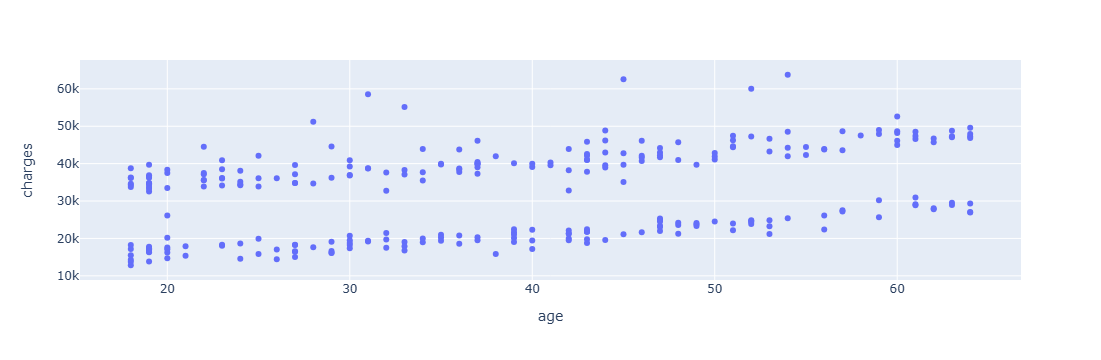

In [43]:
fig.show()

In [60]:
def try_params(w,b,smoker):
    if smoker=='yes':
        ages= smoker_df.age
        target = smoker_df.charges
    elif smoker=='no':
        ages=non_smoker_df.age
        target = non_smoker_df.charges
    plt.title('Age vs Estimated Charge');
    
    x = estimate_charges(ages,w,b)
    plt.plot(ages,x,'r');
    plt.scatter(ages,target,s=8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);
    loss = rmes(target, x)
    print("RMES Loss:", loss)

RMES Loss: 25710.785061791506


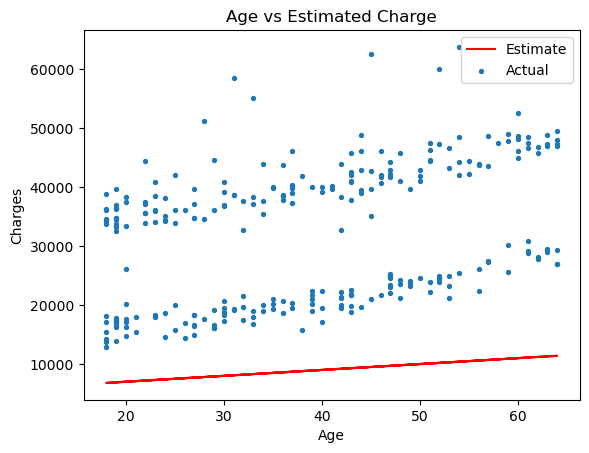

In [62]:
try_params(100,5000,smoker='yes')

In [52]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print(targets.shape)
input.shape

(274,)


(1064, 1)

In [73]:
models = LinearRegression()

In [74]:
models.fit(inputs,targets)

LinearRegression()

In [53]:
inputs

,age
0,19
11,62
14,27
19,30
23,34
...,...
1313,19
1314,30
1321,62
1323,42


In [54]:
targets

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [55]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [75]:
models.coef_

array([305.23760211])

In [76]:
models.intercept_

20294.128126915966

RMES Loss: 10711.00334810241


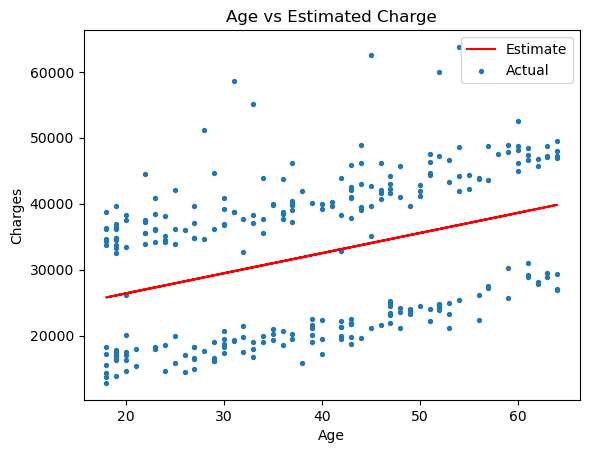

In [77]:
try_params(models.coef_,models.intercept_,'yes')

In [98]:
models.predict(np.array([[200]]))

C:\Users\taush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([81341.64854888])

In [101]:
sex_value = {'female':0, 'male':1}
sex_numeric = medical_df.sex.map(sex_value)
medical_df.charges.corr(sex_numeric)

0.057292062202025366

In [102]:
region_value = {'southwest':0, 'southeast':1,'northeast':2,'northwest':3}
region_numeric = medical_df.region.map(region_value)
medical_df.charges.corr(region_numeric)

-0.01174085480659025